## 영상정보처리 7주차 과제 템플리트
- 마감: 11월 1일 11시 59분 PM
- 점수: 10점 만점
-- 일부만 찾은 경우 5점, 다 찾으면 10점
- 이미지 경로 잘못 사용한 경우: -3
- 소스 이미지: 
1. messi5.jpg - 샘플 검출 대상 이미지
2. messi5_shirt_blue.png - 셔츠의 파란 부분
3. messi5_shirt_red.png - 셔츠의 붉은 부분
    

이름: 이상민       
학번: 32153180


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [75]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [76]:
%cd /gdrive/My\ Drive/ImageProcClass/Week9
%ls

/gdrive/My Drive/ImageProcClass/Week9
2020-2-ImgProc-HW9-이상민-32153180.ipynb  2020-2-ImgProc-HW9-Template.ipynb


다음의 경로는 변경하지 말것

In [77]:
src_image_path = '../Dongkeun-OpenCV-ImgData/messi5.jpg'
red_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_red.png'
blue_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_blue.png'

##문제 1:

위에서 언급한 src_image_path 의 이미지 부분 중에서 셔츠 부분을 검출하는 것이 최종 목표이며, 결과 이미지에는 해당 영역의 3-채널 영상 부분이 담겨 있어야 한다. 
방법은 수업 동영상에 설명한 histgram backprojection 을 사용하며, 구체적 단계는 강의 동영상을 참조한다. red_roi_image_path 와 blue_roi_image_path 를 검출 대상에 히스토그램 작성에 사용한다. 






In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_with_matplotlib(image, title):
  image_RGB = image[:, :, ::-1]
  plt.imshow(image_RGB)
  plt.title(title)
  plt.show()

def show_with_matplotlib_gray(image, title):
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.show()

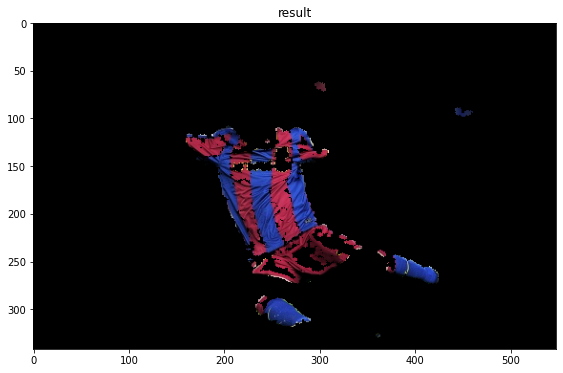

In [81]:
red_roi = cv2.imread(red_roi_image_path)
red_roi_hsv = cv2.cvtColor(red_roi, cv2.COLOR_BGR2HSV)

blue_roi = cv2.imread(blue_roi_image_path)
blue_roi_hsv = cv2.cvtColor(blue_roi, cv2.COLOR_BGR2HSV)

messi = cv2.imread(src_image_path)
messi_hsv = cv2.cvtColor(messi, cv2.COLOR_BGR2HSV)

red_roi_hist = cv2.calcHist([red_roi_hsv], [0, 2], None, [180, 256], [0, 180, 0, 256])
blue_roi_hist = cv2.calcHist([blue_roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

cv2.normalize(red_roi_hist, red_roi_hist, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(blue_roi_hist, blue_roi_hist, 0, 255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([messi_hsv], [0, 1], red_roi_hist, [0, 180, 0, 256], 1)
dst2 = cv2.calcBackProject([messi_hsv], [0, 1], blue_roi_hist, [0, 180, 0, 256], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

cv2.filter2D(dst, -1, disc, dst)
cv2.filter2D(dst2, -1, disc, dst2)

ret, thresh = cv2.threshold(dst, 50, 255, 0)
ret2, thresh2 = cv2.threshold(dst2, 50, 255, 0)

thresh = cv2.merge((thresh, thresh, thresh))
thresh2 = cv2.merge((thresh2, thresh2, thresh2))
res = cv2.bitwise_and(messi, thresh)
res2 = cv2.bitwise_and(messi, thresh2)

result = cv2.bitwise_or(res, res2)

plt.figure(figsize=(12, 6))
show_with_matplotlib(result, 'result')